# Notebook de Prueba (Casas 2017)
Unos comandos y unos primeros analisis de datos de los datos del TP.

http://www.properati.com.ar/data/

Archivo CSV properati-AR-2017-08-01-properties-sell.csv


In [72]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True

df = pd.read_csv('/home/matias/Escritorio/notebook/properati-AR-2017-08-01-properties-sell.csv')
df.head()



,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,c8a66ee9e3da083ab66dacd165e8a5cc718b1cf2,2012-09-19,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,Bs.As. G.B.A. Zona Oeste,3429244.0,NaN,...,93.0,360.360360,1290.322581,NaN,NaN,NaN,http://www.properati.com.ar/udh_venta_casa_mer...,CASA CON LOCAL EN VENTA EN PADUA.2 DORMITORIOS...,CASA EN VENTA,https://thumbs4.properati.com/1/ufoyqwscVk8n3e...
1,a205c53378e7879cf7519659317fb410c060d20e,2012-10-22,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,Bs.As. G.B.A. Zona Oeste,3429244.0,NaN,...,220.0,1000.000000,1000.000000,NaN,NaN,NaN,http://www.properati.com.ar/20hi_venta_casa_me...,CHALET VENTA 4 AMBIENTES PADUA.EXCELENTE CHALE...,CASA EN VENTA,https://thumbs4.properati.com/5/I5RS_jAIUseo9H...
2,e06d6f864a0b91346594da4d27ceddcef0947ea6,2012-11-01,sell,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-38.0199509,-57.5265733",...,42.0,NaN,NaN,NaN,2.0,NaN,http://www.properati.com.ar/336o_venta_departa...,DTO. 2 AMB. C/ VISTA PLENA AL 6 X 3DOMITORIO ...,DTO. 2 AMB. C/ VISTA PLENA AL MAR,https://thumbs4.properati.com/5/VjDOdzm9n8uqZu...
3,a07927207d2a03de5f4ba7fd76f670d6285a3315,2012-11-26,sell,house,Sierra de los Padres,|Argentina|Buenos Aires Interior|General Pueyr...,Argentina,Buenos Aires Interior,3427958.0,"-37.9511934894,-57.7752885836",...,265.0,NaN,NaN,NaN,6.0,NaN,http://www.properati.com.ar/47hc_venta_terreno...,PROPIEDAD DE CATEGORIA CUENTA CON: 4 DORMITOR...,CHALET EN VENTA,https://thumbs4.properati.com/9/DA4GMdxXrthh5z...
4,9446052c949050359fb08b9f1ba83ba2eaa20c99,2012-12-08,sell,house,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6544492346,-58.4895603251",...,103.0,616.666667,1796.116505,NaN,5.0,NaN,http://www.properati.com.ar/4m4m_venta_casa_ma...,Casa Multifamiliar en Mataderos!!! Sobre lote ...,CASA EN VENTA,https://thumbs4.properati.com/6/DsNJjCb5_zIPV0...


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187482 entries, 0 to 187481
Data columns (total 27 columns):
id                            187482 non-null object
created_on                    187482 non-null object
operation                     187482 non-null object
property_type                 187482 non-null object
place_name                    187447 non-null object
place_with_parent_names       187482 non-null object
country_name                  187482 non-null object
state_name                    187482 non-null object
geonames_id                   158318 non-null float64
lat-lon                       118761 non-null object
lat                           118761 non-null float64
lon                           118761 non-null float64
price                         154443 non-null float64
currency                      154441 non-null object
price_aprox_local_currency    154443 non-null float64
price_aprox_usd               154443 non-null float64
surface_total_in_m2           12502

Nos quedamos con las propiedades de capital federal solamente

In [74]:
propCF = df[df['state_name']== 'Capital Federal']
propCF.head()


,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
4,9446052c949050359fb08b9f1ba83ba2eaa20c99,2012-12-08,sell,house,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6544492346,-58.4895603251",...,103.0,616.666667,1796.116505,NaN,5.0,NaN,http://www.properati.com.ar/4m4m_venta_casa_ma...,Casa Multifamiliar en Mataderos!!! Sobre lote ...,CASA EN VENTA,https://thumbs4.properati.com/6/DsNJjCb5_zIPV0...
42,10221a1b3c08244137b0e3dcf68ff971ffef7ec3,2013-05-05,sell,house,Barracas,|Argentina|Capital Federal|Barracas|,Argentina,Capital Federal,3436134.0,"-34.6514583,-58.3773545",...,152.0,921.052632,921.052632,NaN,4.0,NaN,http://www.properati.com.ar/6w5f_venta_casa_ba...,SANTIAGO JANNOT PROP. - - SRA. ALICIA 15-CA...,CASA EN VENTA,https://thumbs4.properati.com/0/n3FaYuo85LbQeS...
107,1cfaaa88d2f99d5d21d96bc27b017d234a9987f7,2013-05-24,sell,house,Paternal,|Argentina|Capital Federal|Paternal|,Argentina,Capital Federal,3430087.0,"-34.5951191,-58.4653876",...,200.0,1329.113924,1050.000000,NaN,4.0,NaN,http://www.properati.com.ar/7fff_venta_casa_pa...,Hermosa casa en dos plantas reciclada a nueva ...,hermosa propiedad,https://thumbs4.properati.com/6/po7VypQvVgV_jf...
162,2be46f28393a5769ede794ef8435fb2282c3dffa,2013-05-24,sell,apartment,Barracas,|Argentina|Capital Federal|Barracas|,Argentina,Capital Federal,3436134.0,"-34.6346787,-58.3710911",...,60.0,1333.333333,1333.333333,NaN,2.0,NaN,http://www.properati.com.ar/7fmr_venta_departa...,"Departamento en torre con living comedor,cocin...",Departamento,https://thumbs4.properati.com/7/rVJm13qMQ0eVmu...
189,719a37d04c5df1fe84800bcaa5f444c3f51ba748,2013-05-24,sell,apartment,Congreso,|Argentina|Capital Federal|Congreso|,Argentina,Capital Federal,3435259.0,"-34.6101819118,-58.3947372437",...,79.0,1642.857143,1746.835443,NaN,3.0,NaN,http://www.properati.com.ar/7fq1_venta_departa...,"EXCELENTE 3 AMBIENTES AL FRENTE, CON BALCN. IM...",EDIFICIO DE EPOCA EN IMPECABLE ESTADO SUPER AM...,https://thumbs4.properati.com/4/xEkV9y5dxo0Bz7...


Para un primer analisis basico dividiremos las propiedades en Departamentos y Casas, veremos el top 10 de los barrios mas caros para departamentos y Casas

## Analisis sobre las casas

In [75]:
casasCF = propCF[propCF['property_type']== 'house']
casasCF.head()

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
4,9446052c949050359fb08b9f1ba83ba2eaa20c99,2012-12-08,sell,house,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6544492346,-58.4895603251",...,103.0,616.666667,1796.116505,NaN,5.0,NaN,http://www.properati.com.ar/4m4m_venta_casa_ma...,Casa Multifamiliar en Mataderos!!! Sobre lote ...,CASA EN VENTA,https://thumbs4.properati.com/6/DsNJjCb5_zIPV0...
42,10221a1b3c08244137b0e3dcf68ff971ffef7ec3,2013-05-05,sell,house,Barracas,|Argentina|Capital Federal|Barracas|,Argentina,Capital Federal,3436134.0,"-34.6514583,-58.3773545",...,152.0,921.052632,921.052632,NaN,4.0,NaN,http://www.properati.com.ar/6w5f_venta_casa_ba...,SANTIAGO JANNOT PROP. - - SRA. ALICIA 15-CA...,CASA EN VENTA,https://thumbs4.properati.com/0/n3FaYuo85LbQeS...
107,1cfaaa88d2f99d5d21d96bc27b017d234a9987f7,2013-05-24,sell,house,Paternal,|Argentina|Capital Federal|Paternal|,Argentina,Capital Federal,3430087.0,"-34.5951191,-58.4653876",...,200.0,1329.113924,1050.000000,NaN,4.0,NaN,http://www.properati.com.ar/7fff_venta_casa_pa...,Hermosa casa en dos plantas reciclada a nueva ...,hermosa propiedad,https://thumbs4.properati.com/6/po7VypQvVgV_jf...
295,45219d355ac8cee870df5de4ab72f7ca7919fbe9,2013-05-27,sell,house,Villa Real,|Argentina|Capital Federal|Villa Real|,Argentina,Capital Federal,3427383.0,"-34.6166755,-58.5289807",...,105.0,1538.461538,2095.238095,NaN,3.0,NaN,http://www.properati.com.ar/7i0q_venta_casa_vi...,"Casa de 3amb. 2 baos. Garage, Patio. Terraza y...",CASA,https://thumbs4.properati.com/8/XA7cNG3paCY-I0...
357,bae90e098ef533c4f89554f29f1646527cf8235c,2013-07-19,sell,house,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,NaN,...,90.0,1327.160494,2388.888889,NaN,4.0,NaN,http://www.properati.com.ar/8pky_venta_casa_ma...,"CASA 4 EN MATADEROS, BARRIO NAON!! SOBRE LOTE ...",CASA EN VENTA,https://thumbs4.properati.com/5/00qrx_0vkRaQre...


Trataremos de hacer un analisis actual por lo que solo nos quedaremos con las propiedades agregadas en el 2017


In [76]:
casasCF2017 = casasCF[casasCF.created_on.str.contains('2017')]
casasCF2017.head()

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
60124,344d7d264dc005a06ed2dcdf8fabddbf4c52efc4,2017-01-01,sell,house,Colegiales,|Argentina|Capital Federal|Colegiales|,Argentina,Capital Federal,3435356.0,"-34.5755289033,-58.4523806064",...,117.0,2406.015038,2735.042735,NaN,NaN,NaN,http://www.properati.com.ar/14mqb_venta_casa_c...,Excelente ubicación en pleno barrio de Colegia...,Casa de 3 ambientes a refaccionar,https://thumbs4.properati.com/1/HSiBiFffftmyfU...
60128,e34921b62c9e5dc203214050e834f65859e838b2,2017-01-01,sell,house,Colegiales,|Argentina|Capital Federal|Colegiales|,Argentina,Capital Federal,3435356.0,"-34.5730786074,-58.4542988712",...,190.0,2227.272727,2578.947368,NaN,NaN,NaN,http://www.properati.com.ar/14mqj_venta_casa_c...,Único inmueble de estilo en la mejor zona de C...,Casa de 4 ambientes estilo ingles,https://thumbs4.properati.com/4/xxaDLDedD4I7j9...
60182,84767624a9e96e6751a8c187ba71ddaa23de8aad,2017-01-03,sell,house,Flores,|Argentina|Capital Federal|Flores|,Argentina,Capital Federal,3433918.0,"-34.6455745,-58.4510728",...,302.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/14n1o_venta_casa_f...,MUY BUENA PROPIEDAD QUE CUENTA CON LIVING-COME...,"CASA EN 2 PLANTA CON GARAGE, LOCAL Y FONDO LIBRE",https://thumbs4.properati.com/7/fEdaUFI7tsXeo-...
60311,abb08a76444477221c02d164892c1c0cda8b621c,2017-01-03,sell,house,Flores,|Argentina|Capital Federal|Flores|,Argentina,Capital Federal,3433918.0,"-34.6290679,-58.455338",...,500.0,1774.193548,2200.000000,NaN,7.0,NaN,http://www.properati.com.ar/14nwi_venta_casa_f...,"EXCELENTE CASA EN FLORES. CUATRO PLANTAS, PAT...",CASA EN VENTA,https://thumbs4.properati.com/5/ClYchBryXLmBQL...
60314,f16933215ec961c79fbae9942165cfa050e22db0,2017-01-03,sell,house,Saavedra,|Argentina|Capital Federal|Saavedra|,Argentina,Capital Federal,3429422.0,"-34.559695,-58.4892333",...,115.0,1552.511416,2956.521739,NaN,4.0,NaN,http://www.properati.com.ar/14ny6_venta_casa_s...,Venta de Casa 4 AMBIENTES en SaavedraCasa de 4...,CASA EN VENTA,https://thumbs4.properati.com/7/wcmi3ZbEnhMtjC...


In [77]:
casasCF2017.columns.values

array(['id', 'created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail'], dtype=object)

In [78]:
casasCF2017S= casasCF2017[['place_name','place_with_parent_names','surface_total_in_m2', 'price_usd_per_m2'
       ]]
casasCF2017S.head()

,place_name,place_with_parent_names,surface_total_in_m2,price_usd_per_m2
60124,Colegiales,|Argentina|Capital Federal|Colegiales|,133.0,2406.015038
60128,Colegiales,|Argentina|Capital Federal|Colegiales|,220.0,2227.272727
60182,Flores,|Argentina|Capital Federal|Flores|,382.0,NaN
60311,Flores,|Argentina|Capital Federal|Flores|,620.0,1774.193548
60314,Saavedra,|Argentina|Capital Federal|Saavedra|,219.0,1552.511416


Calculamos el precio de la propiedad mediante el total de m2 por el producto del precio por m2

In [79]:
casasCF2017S.dropna(inplace=True)
casasCF2017S['price_property'] = casasCF2017S['surface_total_in_m2']*casasCF2017S['price_usd_per_m2']
casasCF2017S.head()

/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,place_name,place_with_parent_names,surface_total_in_m2,price_usd_per_m2,price_property
60124,Colegiales,|Argentina|Capital Federal|Colegiales|,133.0,2406.015038,320000.0
60128,Colegiales,|Argentina|Capital Federal|Colegiales|,220.0,2227.272727,490000.0
60311,Flores,|Argentina|Capital Federal|Flores|,620.0,1774.193548,1100000.0
60314,Saavedra,|Argentina|Capital Federal|Saavedra|,219.0,1552.511416,340000.0
60340,Capital Federal,|Argentina|Capital Federal|,1672.0,508.373206,850000.0


In [84]:
porBarrio = casasCF2017S.groupby('place_name').agg([np.mean,np.size])
porBarrio.head()

surface_total_in_m2       price_usd_per_m2       price_property  \
                          mean  size             mean  size           mean   
place_name                                                                   
Abasto              334.333333   3.0      1432.703521   3.0  470000.000000   
Agronomía           494.000000   1.0       860.323887   1.0  425000.000000   
Almagro             382.416667  24.0      2479.623240  24.0  496666.666667   
Balvanera           389.000000   2.0       998.246721   2.0  354500.000000   
Barracas            302.000000  35.0      1102.912500  35.0  300685.714286   

                  
            size  
place_name        
Abasto       3.0  
Agronomía    1.0  
Almagro     24.0  
Balvanera    2.0  
Barracas    35.0

In [85]:
porBarrio2 = porBarrio.drop(['Capital Federal'])
porBarrio2.head()

surface_total_in_m2       price_usd_per_m2       price_property  \
                          mean  size             mean  size           mean   
place_name                                                                   
Abasto              334.333333   3.0      1432.703521   3.0  470000.000000   
Agronomía           494.000000   1.0       860.323887   1.0  425000.000000   
Almagro             382.416667  24.0      2479.623240  24.0  496666.666667   
Balvanera           389.000000   2.0       998.246721   2.0  354500.000000   
Barracas            302.000000  35.0      1102.912500  35.0  300685.714286   

                  
            size  
place_name        
Abasto       3.0  
Agronomía    1.0  
Almagro     24.0  
Balvanera    2.0  
Barracas    35.0

In [89]:
porBarrio3 = porBarrio2.loc[porBarrio2[('price_property','size')]>10,:]
topBarrios = porBarrio3.sort_values([('price_property','mean')], ascending =False).head(57)
topBarrios.head(57)

surface_total_in_m2       price_usd_per_m2        \
                                mean  size             mean  size   
place_name                                                          
Palermo Chico             527.923077  13.0      6006.060592  13.0   
Belgrano                  417.792683  82.0      2439.615323  82.0   
Palermo                   323.536585  41.0      2636.762874  41.0   
Nuñez                     281.068966  29.0      2175.707031  29.0   
Almagro                   382.416667  24.0      2479.623240  24.0   
Colegiales                256.100000  20.0      2039.781456  20.0   
San Telmo                 321.090909  11.0      1844.600433  11.0   
Caballito                 278.466667  45.0      1773.503059  45.0   
Villa Devoto              285.744186  43.0      1742.518728  43.0   
San Cristobal             381.833333  12.0      1307.549080  12.0   
Villa Crespo              258.727273  22.0      1652.062190  22.0   
Saavedra                  231.484848  33.0      1688.961017  33.0   
Boedo                     177.969697  33.0      5223.480670  33.0   
Villa del Parque          283.296296  27.0      1421.420845  27.0   
Villa Urquiza             211.761905  42.0      1763.711667  42.0   
Parque Chacabuco          303.473684  19.0      1296.117852  19.0   
Parque Patricios          282.312500  16.0      1289.946342  16.0   
Flores                    262.650000  60.0      1381.533828  60.0   
Villa Luro                259.176471  17.0      1321.785445  17.0   
Barracas                  302.000000  35.0      1102.912500  35.0   
Versalles                 239.285714  14.0      1380.269265  14.0   
Floresta                  278.404762  42.0      1219.168699  42.0   
Liniers                   239.687500  32.0      1304.332436  32.0   
Villa Pueyrredón          196.782609  23.0      1860.418680  23.0   
Mataderos                 280.606742  89.0      1101.566650  89.0   
Boca                      383.100000  20.0       758.789294  20.0   
Villa Lugano              245.763158  38.0       981.547353  38.0   

                 price_property        
                           mean  size  
place_name                             
Palermo Chico      3.126154e+06  13.0  
Belgrano           9.853293e+05  82.0  
Palermo            8.202927e+05  41.0  
Nuñez              5.685828e+05  29.0  
Almagro            4.966667e+05  24.0  
Colegiales         4.845000e+05  20.0  
San Telmo          4.740909e+05  11.0  
Caballito          4.680178e+05  45.0  
Villa Devoto       4.656977e+05  43.0  
San Cristobal      4.352417e+05  12.0  
Villa Crespo       4.166091e+05  22.0  
Saavedra           3.650152e+05  33.0  
Boedo              3.644515e+05  33.0  
Villa del Parque   3.558889e+05  27.0  
Villa Urquiza      3.501833e+05  42.0  
Parque Chacabuco   3.445737e+05  19.0  
Parque Patricios   3.440625e+05  16.0  
Flores             3.416483e+05  60.0  
Villa Luro         3.299000e+05  17.0  
Barracas           3.006857e+05  35.0  
Versalles          2.990000e+05  14.0  
Floresta           2.952262e+05  42.0  
Liniers            2.863125e+05  32.0  
Villa Pueyrredón   2.830435e+05  23.0  
Mataderos          2.788292e+05  89.0  
Boca               2.382500e+05  20.0  
Villa Lugano       2.104474e+05  38.0

In [90]:
topBarrios.count()

surface_total_in_m2  mean    27
                     size    27
price_usd_per_m2     mean    27
                     size    27
price_property       mean    27
                     size    27
dtype: int64

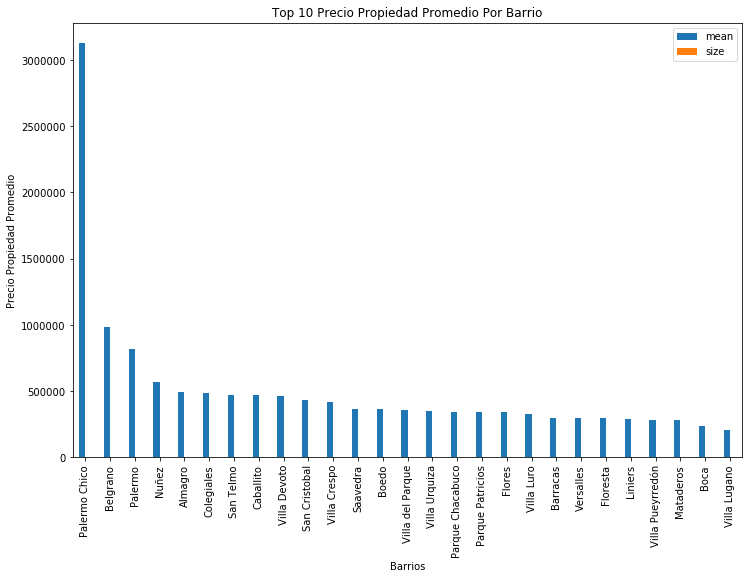

In [91]:
%matplotlib inline
topBarrios_hist = topBarrios['price_property']

imagen =topBarrios_hist.plot(kind='bar',rot=90,figsize=(12,8))
imagen.set_xlabel('Barrios')

imagen.set_ylabel('Precio Propiedad Promedio')

imagen.set_title('Top 10 Precio Propiedad Promedio Por Barrio')

imagenEx = imagen.get_figure()
imagenEx.savefig('/home/matias/Escritorio/Datos/GraficoNote.jpg')